# Load data

In [1]:
import pandas as pd 


df = pd.read_csv('clean_data.csv')
df.head()

,clean_data,type
0,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...,normal
1,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...,normal
2,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,aggressive
3,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,aggressive
4,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...,aggressive


In [2]:
# convert labels from categorical to numeric
label_map = {
    'normal' : 0,
    'aggressive': 1,
}

In [3]:
df['aggressive'] = df['type'].apply(lambda x: label_map[x])

df

,clean_data,type,aggressive
0,صدىقتى امال اقرئى تعلىقى سمحتى صدقىنى صدقىنى ا...,normal,0
1,فاهمه كىفف ربى نظملهم حىاتهم وراهم الطرىق الصح...,normal,0
2,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,aggressive,1
3,اعتقد صهىونى امرىكى جاسوس الغرب ىرىد التجنىس ب...,aggressive,1
4,اشد اعداء الاسلام انزل محمد ىسمون بمفتىىن وعلم...,aggressive,1
...,...,...,...
4401,اوهدى,normal,0
4402,طز,aggressive,1
4403,ترهدىن,normal,0
4404,تقو,aggressive,1


# Preparing dataset

In [4]:
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [5]:
# shuffle will help to reduce bias
dataset = shuffle(df)


X_train, X_test, y_train, y_test = train_test_split(dataset.clean_data, dataset.aggressive, test_size=0.2, random_state=42)

# Ngram model

In [6]:
#Ngram using sklearn
process = df["clean_data"]

from sklearn.feature_extraction.text import CountVectorizer 

v = CountVectorizer(ngram_range=(1, 2))
v.fit(process)
v.vocabulary_


{'صدىقتى': 26205,
 'امال': 11123,
 'اقرئى': 2365,
 'تعلىقى': 17217,
 'سمحتى': 24831,
 'صدقىنى': 26195,
 'القضىه': 8628,
 'اوسع': 11961,
 'تتخىلىن': 15374,
 'ادرى': 1052,
 'مواكبون': 37843,
 'لعصركم': 32733,
 'تعلمون': 17201,
 'ىتم': 45905,
 'توجىهكم': 18372,
 'تفهمون': 17487,
 'السطور': 6485,
 'انكم': 11744,
 'سقطتم': 24701,
 'شراك': 25360,
 'فخاخهم': 29047,
 'بساطه': 13680,
 'تلاحظىن': 17879,
 'الثقافه': 4457,
 'الاخلاق': 2737,
 'المصطلحات': 9915,
 'الجذابه': 4561,
 'ىاكلونها': 45502,
 'جاعوا': 19195,
 'ىستعملونها': 46909,
 'وقت': 43790,
 'الحاجه': 4858,
 'ترىدىن': 16455,
 'اقناعى': 2418,
 'ماىا': 34457,
 'القصورى': 8607,
 'تعرف': 17083,
 'معنى': 36907,
 'الاحترام': 2655,
 'اخلاق': 903,
 'تتعامل': 15423,
 'الناس': 10437,
 'احترام': 521,
 'قالت': 29841,
 'جهارا': 19744,
 'انسه': 11645,
 'تلبس': 17893,
 'نوعا': 39776,
 'الحجاب': 4916,
 'تنشط': 18196,
 'كمذىعه': 31585,
 'التلفاز': 4213,
 'بانها': 13049,
 'تتاجر': 15306,
 'بشكلها': 13794,
 'بحجابها': 13287,
 'ىقوله': 47850,
 'محترم': 3531

In [7]:
# Create a CountVectorizer with n-grams
ngram_vectorizer1 = CountVectorizer(ngram_range=(1, 1))
ngram_vectorizer2 = CountVectorizer(ngram_range=(1, 2))
ngram_vectorizer3 = CountVectorizer(ngram_range=(1, 3))

## NB model

In [8]:
#uni
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = Pipeline ([
    ('vectorizer_bow', ngram_vectorizer1),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict (X_test)

print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       448
           1       0.80      0.88      0.84       434

    accuracy                           0.84       882
   macro avg       0.84      0.84      0.84       882
weighted avg       0.84      0.84      0.84       882



Accuracy score is 0.84


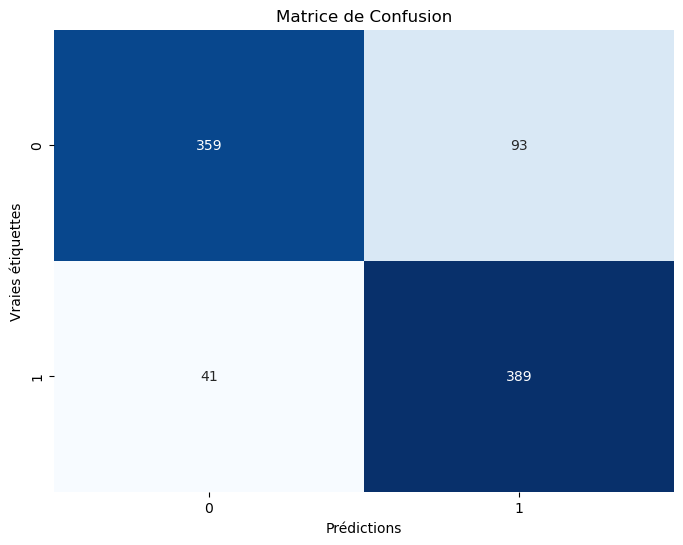

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [8]:
#uni+bi
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = Pipeline ([
    ('vectorizer_bow', ngram_vectorizer2),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict (X_test)

print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       452
           1       0.81      0.90      0.85       430

    accuracy                           0.85       882
   macro avg       0.85      0.85      0.85       882
weighted avg       0.85      0.85      0.85       882



Accuracy score is 0.85


In [9]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [35]:
#uni+bi+tri
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = Pipeline ([
    ('vectorizer_bow', ngram_vectorizer3),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict (X_test)

print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       424
           1       0.84      0.89      0.86       458

    accuracy                           0.85       882
   macro avg       0.86      0.85      0.85       882
weighted avg       0.85      0.85      0.85       882



Accuracy score is 0.85


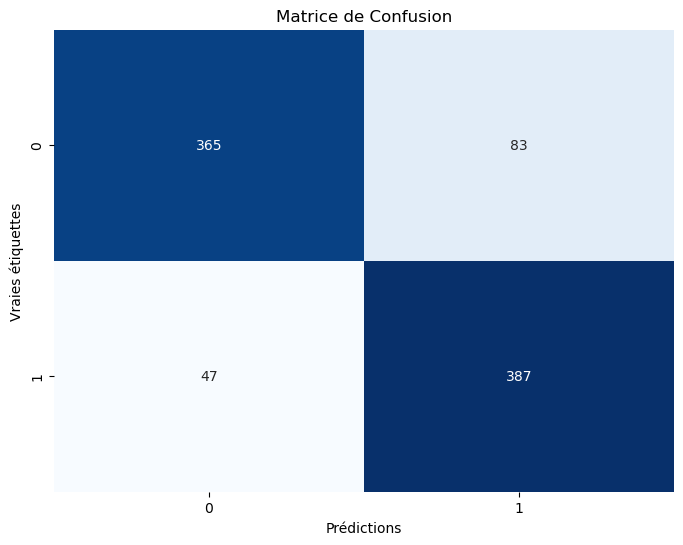

In [12]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## SVM

In [13]:
from sklearn.svm import SVC

In [14]:
# Fit and transform the training data
X_train_ngrams1 = ngram_vectorizer1.fit_transform(X_train)
X_train_ngrams2 = ngram_vectorizer2.fit_transform(X_train)
X_train_ngrams3 = ngram_vectorizer3.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_ngrams1 = ngram_vectorizer1.transform(X_test)
X_test_ngrams2 = ngram_vectorizer2.transform(X_test)
X_test_ngrams3 = ngram_vectorizer3.transform(X_test)

In [15]:
# uni
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train_ngrams1, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_ngrams1)




print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       448
           1       0.87      0.83      0.85       434

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882



Accuracy score is 0.86


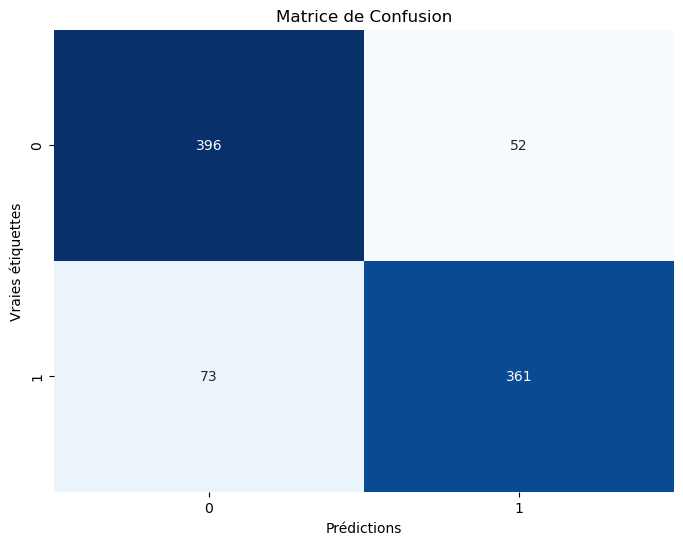

In [16]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [17]:
# uni+bi
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train_ngrams2, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_ngrams2)




print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       448
           1       0.88      0.81      0.85       434

    accuracy                           0.85       882
   macro avg       0.86      0.85      0.85       882
weighted avg       0.86      0.85      0.85       882



Accuracy score is 0.85


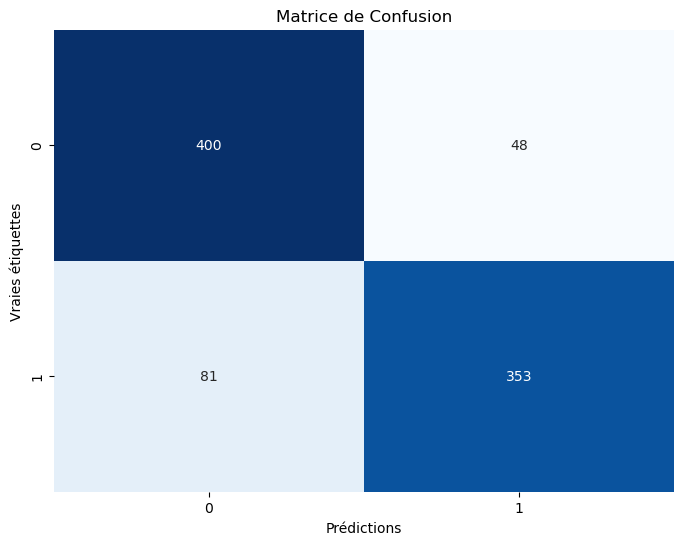

In [18]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [19]:
# uni+bi+tri
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train_ngrams3, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_ngrams3)




print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       448
           1       0.88      0.79      0.83       434

    accuracy                           0.84       882
   macro avg       0.85      0.84      0.84       882
weighted avg       0.85      0.84      0.84       882



Accuracy score is 0.84


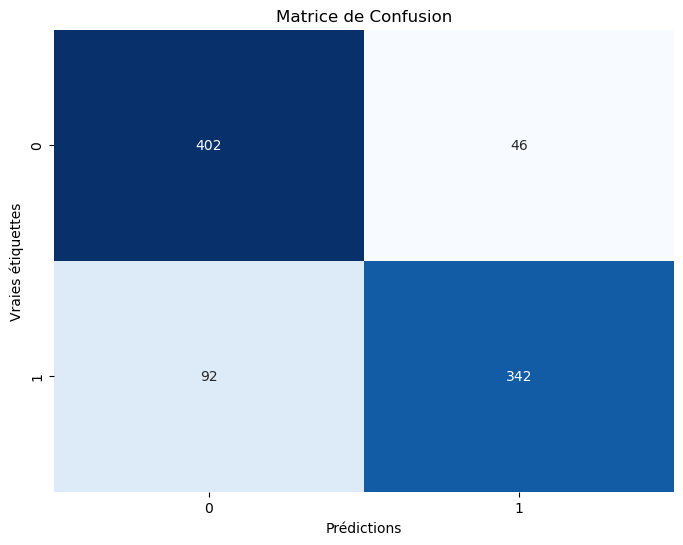

In [20]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#uni
rf_classifier = RandomForestClassifier(n_estimators=20)  

rf_classifier.fit(X_train_ngrams1, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_ngrams1)



print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       448
           1       0.91      0.75      0.82       434

    accuracy                           0.84       882
   macro avg       0.85      0.84      0.84       882
weighted avg       0.85      0.84      0.84       882



Accuracy score is 0.84


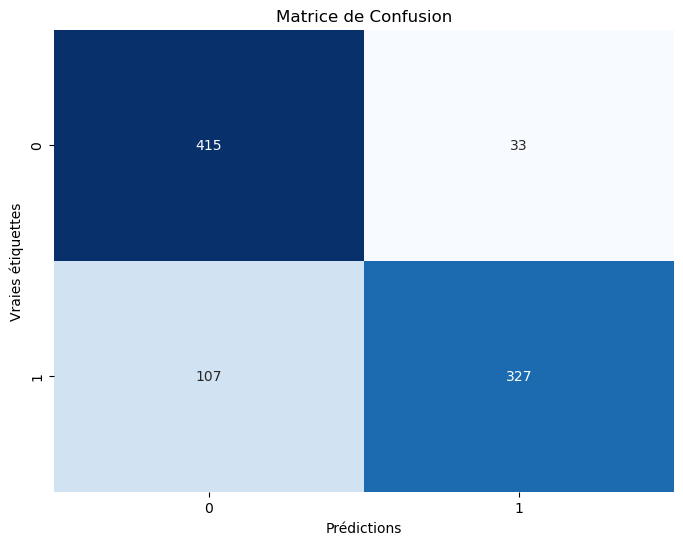

In [23]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [24]:
#uni+bi
rf_classifier = RandomForestClassifier(n_estimators=20)  

rf_classifier.fit(X_train_ngrams2, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_ngrams2)




print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       448
           1       0.93      0.74      0.82       434

    accuracy                           0.84       882
   macro avg       0.86      0.84      0.84       882
weighted avg       0.86      0.84      0.84       882



Accuracy score is 0.84


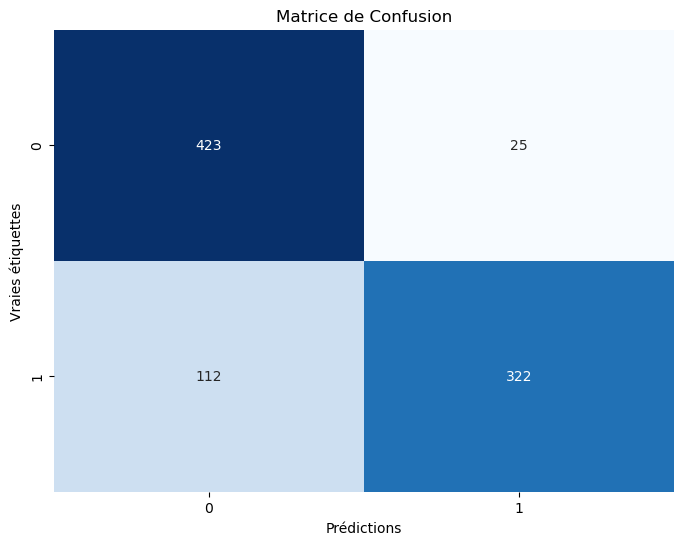

In [25]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [26]:
#uni+bi+tri
rf_classifier = RandomForestClassifier(n_estimators=20)  

rf_classifier.fit(X_train_ngrams3, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_ngrams3)




print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       448
           1       0.92      0.76      0.83       434

    accuracy                           0.85       882
   macro avg       0.86      0.85      0.85       882
weighted avg       0.86      0.85      0.85       882



Accuracy score is 0.85


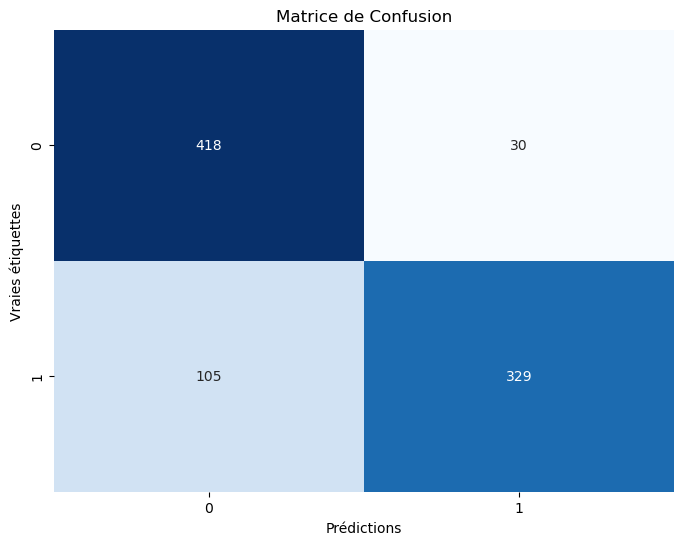

In [27]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
#uni
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train_ngrams1, y_train)

# Make predictions on the test data
y_pred = lr_classifier.predict(X_test_ngrams1)



print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       448
           1       0.89      0.81      0.85       434

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882



Accuracy score is 0.86


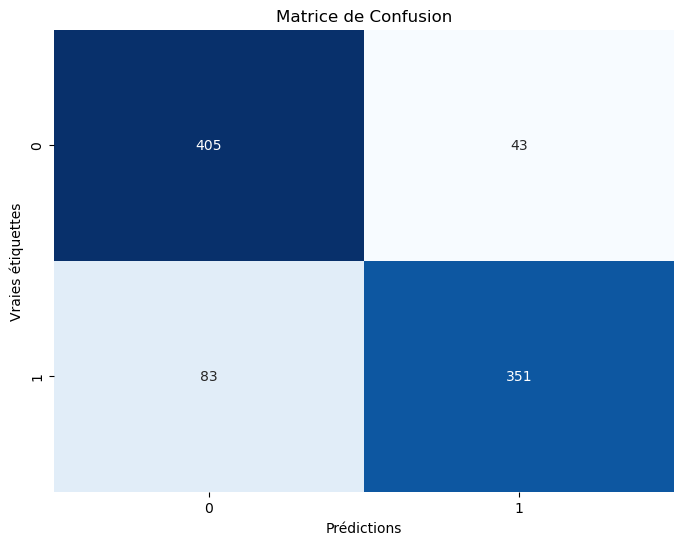

In [30]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [31]:
#uni+bi
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train_ngrams2, y_train)

# Make predictions on the test data
y_pred = lr_classifier.predict(X_test_ngrams2)



print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       448
           1       0.89      0.81      0.85       434

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882



Accuracy score is 0.86


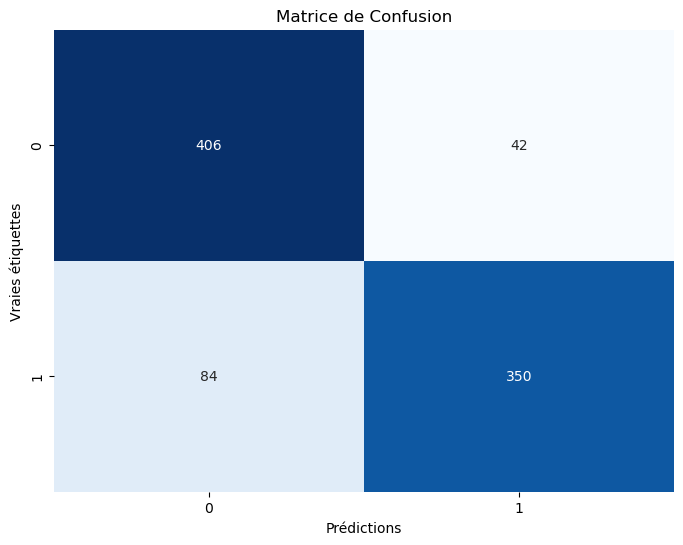

In [32]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

In [33]:
#uni+bi+tri
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train_ngrams3, y_train)

# Make predictions on the test data
y_pred = lr_classifier.predict(X_test_ngrams3)



print(classification_report(y_test, y_pred))
print("\n")
print(f"Accuracy score is {accuracy_score(y_test,  y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       448
           1       0.89      0.80      0.84       434

    accuracy                           0.85       882
   macro avg       0.86      0.85      0.85       882
weighted avg       0.86      0.85      0.85       882



Accuracy score is 0.85


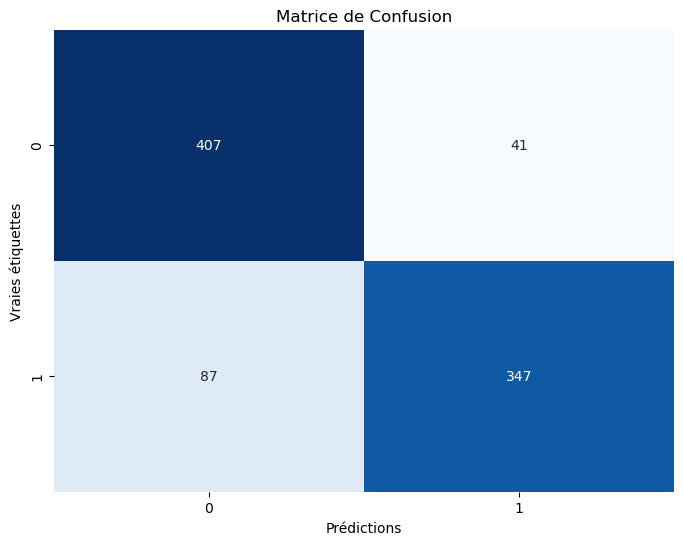

In [34]:
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()